In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
from collections import defaultdict
import numpy as np

## Loading dataset

Converted the excel file to a pandas dataframe

In [3]:
path = "/content/gdrive/MyDrive/Recommender.xlsx"

In [4]:
df = pd.io.excel.read_excel(path)

In [5]:
df.head()

,Year,UserId,ProductId
0,2019,1,1
1,2019,2,1
2,2019,3,1
3,2019,4,1
4,2019,5,1


##Seperation of the dataset
We seprate the dataset into 2 parts - one with year 2019/2020 and the other with year 2021. The former would be called training data and the latter validation data. To check our model we seperate a validation set on which we will testing our dataset, we use the Leave one out cross validation(LOOCV) method and we pick the user randomly.

In [16]:
year_list = ['2021']
valid_df = df[df.Year.isin(year_list)]
year_list = ['2019','2020']
train_df = df[df.Year.isin(year_list)]

In [17]:
train_df.head()

,Year,UserId,ProductId
0,2019,1,1
1,2019,2,1
2,2019,3,1
3,2019,4,1
4,2019,5,1


In [18]:
valid_df.head()

,Year,UserId,ProductId
243,2021,222,3
407,2021,301,2
410,2021,294,2
466,2021,320,5
467,2021,235,5


We find the set of users and the set of items on the whole dataset

In [33]:
userSet = set()
itemSet = set()
for index,d in df.iterrows():
  userSet.add(d['UserId'])
  itemSet.add(d['ProductId'])

total_users = len(userSet)
total_items = len(itemSet)

In [27]:
import random

ValidUserId = random.randint(1,total_users)
Valid_User_item_matrix = user_item_matrix[ValidUserId]

##User and Item datasets

For a recommendation system to work properly, we would require three types of data -


1.   **User Dictionary:** These contain the items bought by each user
2.   **Item Dictionary:** These contain the users that bought each item.
3. **User-Item Matrix:** This contains the items each user bought as well as how many times that particular item was bought.



In [35]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

In [36]:
for index,d in train_df.iterrows():
    user,item = d['UserId'], d['ProductId']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)

In [94]:
#The above only contains the set of user/items of training dataset
totalUsersPerItem = defaultdict(set)
totalItemsPerUser = defaultdict(set)
for index,d in df.iterrows():
    user,item = d['UserId'], d['ProductId']
    totalUsersPerItem[item].add(user)
    totalItemsPerUser[user].add(item)

We have created the sets of users per item and items per user

In [37]:
train_items = len(usersPerItem)
print("The total number of items in the training dataset are", train_items)
train_users = len(itemsPerUser)
print("The total number of users in the training dataset are", train_users)
print("The items bought by user with UserID 1 in 2019/20 is - ", itemsPerUser[1])

The total number of items in the training dataset are 25
The total number of users in the training dataset are 643
The items bought by user with UserID 1 in 2019/20 is -  {1, 4, 5, 6, 7, 8, 13, 15, 17}


In [38]:
user_item_matrix = np.empty([total_users, total_items])

for index,d in train_df.iterrows():
    user,item = d['UserId'], d['ProductId']
    user_item_matrix[int(user) - 1][int(item) - 1] += 1

We have created a user-item matrix

In [39]:
print("The items bought by user with UserID 1 in 2019/20 is - ")
for i in range(total_items):
  print("The product with ProductID" , i+1 , "was bought" , int(user_item_matrix[0][i]) , "times")

The items bought by user with UserID 1 in 2019/20 is - 
The product with ProductID 1 was bought 3 times
The product with ProductID 2 was bought 0 times
The product with ProductID 3 was bought 0 times
The product with ProductID 4 was bought 1 times
The product with ProductID 5 was bought 1 times
The product with ProductID 6 was bought 1 times
The product with ProductID 7 was bought 1 times
The product with ProductID 8 was bought 1 times
The product with ProductID 9 was bought 0 times
The product with ProductID 10 was bought 0 times
The product with ProductID 11 was bought 0 times
The product with ProductID 12 was bought 0 times
The product with ProductID 13 was bought 1 times
The product with ProductID 14 was bought 0 times
The product with ProductID 15 was bought 3 times
The product with ProductID 16 was bought 0 times
The product with ProductID 17 was bought 1 times
The product with ProductID 18 was bought 0 times
The product with ProductID 19 was bought 0 times
The product with Produ

As you can see this also encodes the information about which product was bought how many times.

##Jaccard Index
The Jaccard index is a statistic used for gauging the similarity and diversity of sample sets. The Jaccard coefficient measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets.

The thing to note is that Jaccard Similarity finds the similarity between two

In [51]:
def Jaccard(s1, s2):
  if(len(s1) == 0 or len(s2) == 0):
    return 0
  numer = len(s1.intersection(s2))
  denom = len(s1.union(s2))
  return numer / denom

Based on the Jaccard similarity, we can create a similarity matrix between all the items.

In [52]:
jaccard_sim_matrix = np.zeros([total_items, total_items])

for i in range(total_items):
  for j in range(total_items):
    set_one = usersPerItem[i+1]
    set_two = usersPerItem[j+1]
    jaccard_index = Jaccard(set_one, set_two)
    jaccard_sim_matrix[i][j] = jaccard_index

The following color plot, shows the similarity between items.

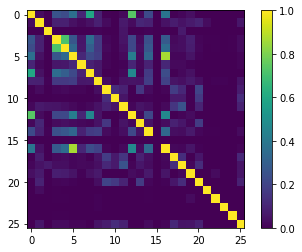

In [53]:
import matplotlib.pyplot as plt

plt.imshow(jaccard_sim_matrix)
plt.colorbar()
plt.show()

For each item we can see all the similar items, and thus can use this for recommendation, we also calculate the same for each user.

In [54]:
jaccard_sim_matrix_users = np.zeros([total_users, total_users])

for i in range(total_users):
  for j in range(total_users):
    set_one = itemsPerUser[i+1]
    set_two = itemsPerUser[j+1]
    jaccard_index = Jaccard(set_one, set_two)
    jaccard_sim_matrix_users[i][j] = jaccard_index

The following color plot, shows the similarity between users.

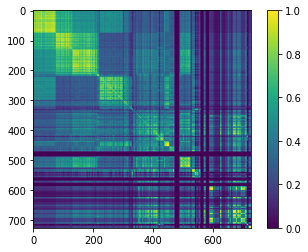

In [55]:
import matplotlib.pyplot as plt

plt.imshow(jaccard_sim_matrix_users)
plt.colorbar()
plt.show()

##Cosine Similarity
Given that we have a vector of items for each user we can find similarity between them.

In [77]:
#This checks whether the array is all zeros
def check(arr):
    if np.all(arr == 0):
        return True
    return False

In [78]:
from scipy import spatial

def cosine_sim(a, b):
  if(check(a) or check(b)):
    return 0.0
  cosine_similarity = 1 - float(spatial.distance.cosine(a, b))
  return cosine_similarity

To find the Item-Item cosine similarity we take the column of the user-item matrix and fine their similarities

In [79]:
Item_vector_one = user_item_matrix[:,0]
Item_vector_two = user_item_matrix[:,1]

print("Cosine Similarity: ", cosine_sim(Item_vector_one,Item_vector_two))

Cosine Similarity:  0.05766167937114075


In [80]:
cosine_similarity_matrix = np.zeros([total_items, total_items])

for i in range(total_items):
  for j in range(total_items):
    Item_vector_one = user_item_matrix[:,i]
    Item_vector_two = user_item_matrix[:,j]
    cos_sim = cosine_sim(Item_vector_one,Item_vector_two)
    cosine_similarity_matrix[i][j] = cos_sim

The following shows the similarity measure in items-


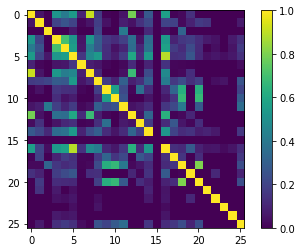

In [81]:
plt.imshow(cosine_similarity_matrix)
plt.colorbar()
plt.show()

##Item Based Collaborative Filtering

Now that we have a similarity measure between the items we can use this to recommend items to users

##**Model 1:** K-Nearest Neighbours with cosine similarity

The algorithm works as follows-


*   For each user determine the set of items bought
*   For each item in the list find the K-Nearest items based on cosine similarity
*   From the set we multiply the cosine similarity based on how many times the user has bought that item(the one that was used to find the similar item list)
*   We sort the items based on the value.
*   We can calculate recall and precision for the user.
*   We make predictions based on the items.



In [115]:
def getTopKforItem(ProductId,k):
  cosine_vector = cosine_similarity_matrix[ProductId-1]
  a = dict([(i+1, j) for i, j in enumerate(cosine_vector)])
  sorted_a = dict(sorted(a.items(), key = lambda kv:kv[1], reverse=True))
  indices = list(sorted_a.keys())[1:k+1]
  values = list(sorted_a.values())[1:k+1]
  return (indices,values)

In [116]:
print(getTopKforItem(1,3))

([8, 13, 17], [0.9155075452726154, 0.7903399984919822, 0.5654642857569986])


The above code finds the nearest items for a particular item

In [117]:
def getTopKforUser(UserID,k):
  items = totalItemsPerUser[UserID]
  recommendations = {}
  for item in items:
    item_reccomendations = getTopKforItem(item,k)
    num = user_item_matrix[UserID-1][item-1]
    for i in range(k):
      item_rec = item_reccomendations[0][i]
      item_rec_val = num*item_reccomendations[1][i]
      if item_rec in recommendations:
        recommendations[item_rec] = recommendations[item_rec]+item_rec_val
      else:
        recommendations[item_rec] = item_rec_val
  sorted_rec = dict(sorted(recommendations.items(), key = lambda kv:kv[1], reverse=True))
  indices = list(sorted_rec.keys())[:k]
  values = list(sorted_rec.values())[:k]
  return (indices,values)

The above code takes a user and finds the products that should be recommended based on 

In [118]:
print(itemsPerUser[1])

{1, 4, 5, 6, 7, 8, 13, 15, 17}


In [119]:
print(getTopKforUser(1,1))

([8], [2.746522635817846])


In [120]:
precision = np.zeros([total_items-1])
recall = np.zeros([total_items-1])
times = 0
for user in range(1,total_users):
  items = totalItemsPerUser[user]
  for k in range(1,total_items):
    recs = getTopKforUser(user,k)[0]
    pres = 0
    rec = 0
    for item in recs:
      if item in items:
        rec += 1
        pres += 1
    try:
      pres /= len(recs)
      rec /= len(items)
    except:
      pres = 0
      rec = 0
    precision[k-1] += pres
    recall[k-1] += rec
  times +=1.0
precision = np.divide(precision, times)
recall = np.divide(recall, times)
print(precision)
print(recall)

[0.77348066 0.62638122 0.61325967 0.57769337 0.52900552 0.48664825
 0.45501184 0.39986188 0.39533456 0.36160221 0.33237067 0.30893186
 0.28824904 0.26805446 0.25202578 0.23782804 0.22521937 0.21485574
 0.20449259 0.19537293 0.18639832 0.1781768  0.17061014 0.16355893
 0.15745856]
[0.19301405 0.28501027 0.40026518 0.49437703 0.57146759 0.61489819
 0.66077004 0.63990392 0.739072   0.74825006 0.75519401 0.76468384
 0.77505775 0.77573525 0.78030971 0.78500813 0.7889435  0.79610723
 0.79968524 0.80396756 0.80579767 0.80664174 0.80871357 0.80898981
 0.81314392]


##Precision and Recall curves
We are getting k nearest items for each user, we vary this k from 1 to total number of items which is the max we can get. We plot the precision and recall curves for each value of K.

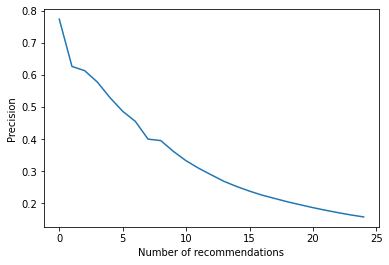

In [121]:
plt.plot(precision[:])
plt.xlabel("Number of recommendations")
plt.ylabel("Precision")
plt.show()

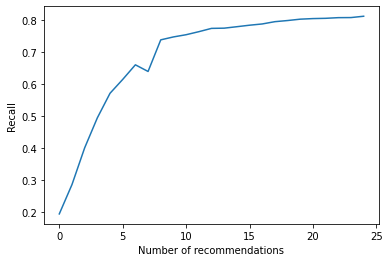

In [122]:
plt.plot(recall[:])
plt.xlabel("Number of recommendations")
plt.ylabel("Recall")
plt.show()

Note that the precision will continue to decrease after some points as we are recommending more than what the user has bought. Whereas the recall should keep on increasing till all the relevant prodcuts are shown.

In [123]:
rec_data = []
for users in range(1,total_users):
  recs = getTopKforUser(users,3)[0]
  recs.insert(0,users)
  rec_data.append(recs)

In [124]:
df = pd.DataFrame(rec_data, columns = ['UserId', 'Recommendation 1','Recommendation 2','Recommendation 3'])

In [125]:
df.to_csv('./knn.csv', sep = ',', index = False)

In [126]:
from google.colab import files
files.download('knn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Predictions on Validation set
Based on the KNN model formed above we test our results on the validation dataset

In [139]:
precision = 0
recall = 0
times = 0

for index,d in valid_df.iterrows():
  ValidUserId = d['UserId']
  items = totalItemsPerUser[ValidUserId]
  recs = getTopKforUser(user,3)[0]
  pres = 0
  rec = 0
  for item in recs:
    if item in items:
      rec += 1
      pres += 1
  pres /= len(recs)
  rec /= len(items)
  precision += pres
  recall += rec
  times += 1

precision = np.divide(precision, times)
recall = np.divide(recall, times)

print("The precision on the validation dataset is" , precision)
print("The recall on the validation dataset is" , recall)

The precision on the validation dataset is 0.6869591166815853
The recall on the validation dataset is 0.44883894579507744


##**Model 2:** Jaccard Index

The algorithm works as follows-


*   For each user determine the set of items bought
*   For each item in the list find the items based on jaccard index
*   We sort the items based on the value.
*   We can calculate recall and precision for the user.
*   We make predictions based on the items.



In [127]:
def getTopKforItemJI(ProductId,k):
  cosine_vector = jaccard_sim_matrix[ProductId-1]
  a = dict([(i+1, j) for i, j in enumerate(cosine_vector)])
  sorted_a = dict(sorted(a.items(), key = lambda kv:kv[1], reverse=True))
  indices = list(sorted_a.keys())[1:k+1]
  values = list(sorted_a.values())[1:k+1]
  return (indices,values)

In [128]:
print(getTopKforItemJI(1,3))

([13, 8, 17], [0.740072202166065, 0.5981735159817352, 0.39037433155080214])


The above code finds the nearest items for a particular item

In [129]:
def getTopKforUserJI(UserID,k):
  items = totalItemsPerUser[UserID]
  recommendations = {}
  for item in items:
    item_reccomendations = getTopKforItemJI(item,k)
    for i in range(k):
      item_rec = item_reccomendations[0][i]
      item_rec_val = item_reccomendations[1][i]
      if item_rec in recommendations:
        recommendations[item_rec] = max(recommendations[item_rec],item_rec_val)
      else:
        recommendations[item_rec] = item_rec_val
  sorted_rec = dict(sorted(recommendations.items(), key = lambda kv:kv[1], reverse=True))
  indices = list(sorted_rec.keys())[:k]
  values = list(sorted_rec.values())[:k]
  return (indices,values)

The above code takes a user and finds the products that should be recommended based on 

In [130]:
print(itemsPerUser[1])

{1, 4, 5, 6, 7, 8, 13, 15, 17}


In [131]:
print(getTopKforUserJI(1,1))

([17], [0.8687196110210696])


In [132]:
precisionJI = np.zeros([total_items-1])
recallJI = np.zeros([total_items-1])
times = 0
for user in range(1,total_users):
  items = totalItemsPerUser[user]
  for k in range(1,total_items):
    recs = getTopKforUserJI(user,k)[0]
    pres = 0
    rec = 0
    for item in recs:
      if item in items:
        rec += 1
        pres += 1
    try:
      pres /= len(recs)
      rec /= len(items)
    except:
      pres = 0
      rec = 0
    precisionJI[k-1] += pres
    recallJI[k-1] += rec
  times +=1.0
precisionJI = np.divide(precisionJI, times)
recallJI = np.divide(recallJI, times)
print(precisionJI)
print(recallJI)

[0.78453039 0.78453039 0.65653775 0.60531768 0.52679558 0.49516575
 0.46685083 0.42955801 0.40239411 0.37320442 0.3401557  0.31560773
 0.29483638 0.27486188 0.25764273 0.24240331 0.22887553 0.21754144
 0.20681884 0.19779006 0.18968692 0.18131592 0.17361278 0.16637891
 0.15977901]
[0.18963007 0.37926014 0.44967542 0.53401741 0.5752309  0.64753708
 0.69654018 0.72874896 0.77410166 0.79754236 0.79866323 0.80570524
 0.81280699 0.81490183 0.81728777 0.81895519 0.82087688 0.82655302
 0.82895754 0.83390147 0.8390603  0.8399389  0.84053803 0.84053803
 0.84099843]


##Precision and Recall curves
We are getting k nearest items for each user, we vary this k from 1 to total number of items which is the max we can get. We plot the precision and recall curves for each value of K.

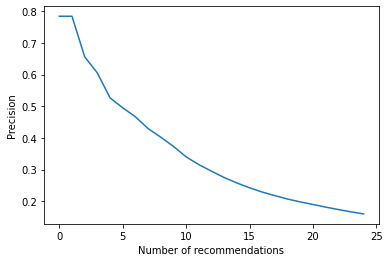

In [133]:
plt.plot(precisionJI[:])
plt.xlabel("Number of recommendations")
plt.ylabel("Precision")
plt.show()

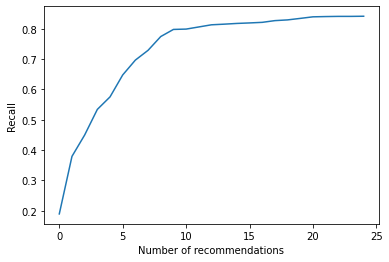

In [134]:
plt.plot(recallJI[:])
plt.xlabel("Number of recommendations")
plt.ylabel("Recall")
plt.show()

Note that the precision will continue to decrease after some points as we are recommending more than what the user has bought. Whereas the recall should keep on increasing till all the relevant prodcuts are shown.

In [135]:
rec_dataJI = []
for users in range(1,total_users):
  recs = getTopKforUserJI(users,3)[0]
  recs.insert(0,users)
  rec_data.append(recs)

In [136]:
dfJI = pd.DataFrame(rec_data, columns = ['UserId', 'Recommendation 1','Recommendation 2','Recommendation 3'])

In [137]:
dfJI.to_csv('./jaccard.csv', sep = ',', index = False)

In [138]:
from google.colab import files
files.download('jaccard.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Predictions on Validation set-

In [141]:
precision_jaccard = 0
recall_jaccard = 0
times = 0

for index,d in valid_df.iterrows():
  ValidUserId = d['UserId']
  items = totalItemsPerUser[ValidUserId]
  recs = getTopKforUserJI(user,3)[0]
  pres = 0
  rec = 0
  for item in recs:
    if item in items:
      rec += 1
      pres += 1
  pres /= len(recs)
  rec /= len(items)
  precision_jaccard += pres
  recall_jaccard += rec
  times += 1

precision_jaccard /= times
recall_jaccard /= times

print("The precision on the validation dataset is" , precision_jaccard)
print("The recall on the validation dataset is" , recall_jaccard)

The precision on the validation dataset is 0.556848701880038
The recall on the validation dataset is 0.36793436345808683


##Jaccard Index v/s K-Nearest Neighbours
**The values for Jaccard Index are -** 
* The precision on the validation dataset is 0.556848701880038
* The recall on the validation dataset is 0.36793436345808683

**The values for K-Nearest Neighbours are -** 
* The precision on the validation dataset is 0.6869591166815853
* The recall on the validation dataset is 0.44883894579507744

It is evident from the values that the K-nearest Neighbours performs better than the Jaccard Index when testing on the validation dataset